In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

In [57]:
def d_sigmoid(n):
    return n * (1 - n)

In [58]:
def linear(n):
    return n

In [59]:
def d_linear(n):
    return 1

In [60]:
class Layer:
    def __init__(self, n, act_func, d_act_func, w, b):
        self.n = n
        self.act_func = act_func
        self.d_act_func = d_act_func
        self.w = w
        self.b = b
        self.a = None
        self.s = None
 

In [61]:
class NeuralNetwork:
    def __init__(self, layers, l_rate):
        self.layers = layers
        self.l_rate = l_rate
        self.predicts = []

    def forwardpass(self, p):
        pa = p
        for layer in self.layers:
            n = layer.w * pa + layer.b
            a = layer.act_func(n)
            layer.a = a
            pa = a
        return pa


    def backpropagation(self, e, X):
        for m in range(len(self.layers) - 1, -1, -1):
            if m == len(self.layers) - 1:
                self.layers[m].s = -2 * self.layers[m].d_act_func(self.layers[m].a) * e
            else:
                self.layers[m].s = self.layers[m].d_act_func(self.layers[m].a) * self.layers[m + 1].w.T * self.layers[m + 1].s #el error podria estar aqui por no usar matriz jacobiana

        for m in range(0, len(self.layers)):
            if(m == 0):
                self.layers[m].w = self.layers[m].w - (self.l_rate * self.layers[m].s * X.T)
            else:
                self.layers[m].w = self.layers[m].w - (self.l_rate * self.layers[m].s * self.layers[m - 1].a.T)

            self.layers[m].b = self.layers[m].b - (self.l_rate * self.layers[m].s)

            # print(f"w: {self.layers[m].w}")
            # print(f"b: {self.layers[m].b}")
        
    def fit(self, X, y, error = False):
        for (p, t) in zip(X, y): #se recorren las entradas y salidas deseadas, donde p es la entrada y t el target
            a = self.forwardpass(np.expand_dims(p, axis = 0))
            e = t - a
            self.backpropagation(e, X)
            if error:
                print(e)

    def predict(self, X):
        self.predicts = []
        for x in X:
            self.predicts.append(self.forwardpass(x))
        return self.predicts

In [62]:
def g(p):
    return 1 + np.sin((np.pi / 4) * p)

(2, 1)


ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

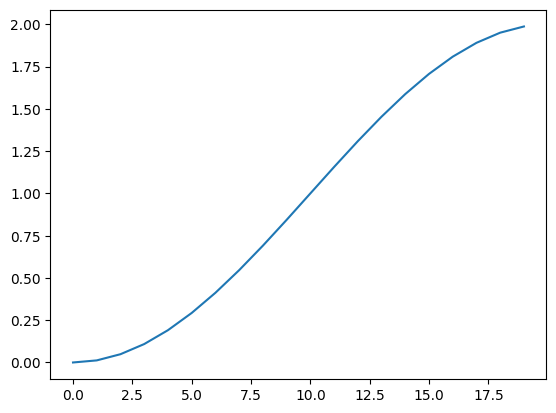

In [63]:
nn = NeuralNetwork([
    Layer(2, sigmoid, d_sigmoid, np.random.uniform(size=(2, 1)), np.expand_dims(np.repeat(1, 2), axis=0).T),
    Layer(1, linear, d_linear, np.random.uniform(size=(2, 1)), np.expand_dims(np.repeat(1, 1), axis=0).T)
], 0.1)

X = np.expand_dims(np.arange(-2, 2, 0.2), axis = 0).T
y = g(X)
plt.plot(y)
nn.fit(X, y, True)
# predicts = nn.predict(X)
# plt.plot(predicts)

